### Data Exploration 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv("data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
length = len(df)
print(length)

614


In [60]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

- Gender = change to binary
- Married = change to binary
- Dependants = chaneg to int and change '3+' to 3 as it can be looked at through higher cardinality of creating dummy variables
- Education = change to binary
- Self_Employed = change to binary
- Property_area = set as higher cardinality
- Loan_Status = change to binary - target variabel

In [4]:
df = df.drop('Loan_ID', axis = 1)

In [5]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.describe()
#redo once object values are changed to numerical

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
# Amount fo applicants with credit history
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

<AxesSubplot:>

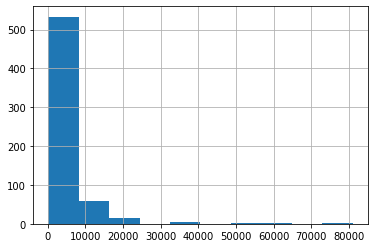

In [9]:
# Applicant Income
df['ApplicantIncome'].hist()

<AxesSubplot:>

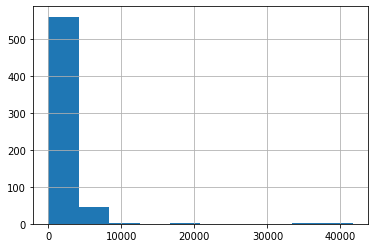

In [10]:
# Coapplicant Income
df['CoapplicantIncome'].hist()

<AxesSubplot:>

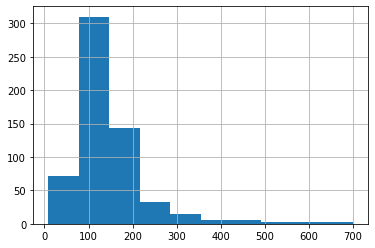

In [12]:
# Hist of loan amount
df['LoanAmount'].hist()

<AxesSubplot:>

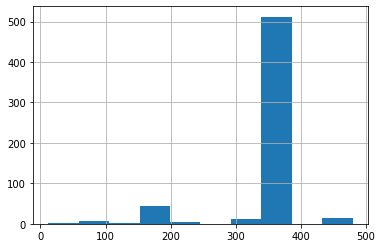

In [13]:
# Hist of loan term
df['Loan_Amount_Term'].hist()

In [17]:
# redo once nulls are replaced/removed
df.skew(axis = 0, skipna = False)

/var/folders/p7/h49crc791_s32gzljswx64y00000gn/T/ipykernel_29543/397523911.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew(axis = 0, skipna = False)


ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount                NaN
Loan_Amount_Term          NaN
Credit_History            NaN
dtype: float64

In [35]:
a = df['Gender'].unique()
b = df['Married'].unique()
c = df['Dependents'].unique()
d = df['Education'].unique()
e = df['Self_Employed'].unique()
f = df['Property_Area'].unique()
g = df['Loan_Status'].unique()
h = df['Loan_Amount_Term'].unique()
a, b, c, d, e, f, g, h

(array(['Male', 'Female', nan], dtype=object),
 array(['No', 'Yes', nan], dtype=object),
 array(['0', '1', '2', '3+', nan], dtype=object),
 array(['Graduate', 'Not Graduate'], dtype=object),
 array(['No', 'Yes', nan], dtype=object),
 array(['Urban', 'Rural', 'Semiurban'], dtype=object),
 array(['Y', 'N'], dtype=object),
 array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.]))

In [36]:
(df['Gender'].value_counts())/len(df)

Male      0.796417
Female    0.182410
Name: Gender, dtype: float64

In [37]:
(df['Married'].value_counts())/len(df)

Yes    0.648208
No     0.346906
Name: Married, dtype: float64

In [38]:
(df['Dependents'].value_counts())/len(df)

0     0.561889
1     0.166124
2     0.164495
3+    0.083062
Name: Dependents, dtype: float64

In [39]:
(df['Education'].value_counts())/len(df)

Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64

In [40]:
(df['Self_Employed'].value_counts())/len(df) 

No     0.814332
Yes    0.133550
Name: Self_Employed, dtype: float64

In [41]:
(df['Credit_History'].value_counts())/len(df) 

1.0    0.773616
0.0    0.144951
Name: Credit_History, dtype: float64

In [42]:
(df['Property_Area'].value_counts())/len(df)

Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64

In [43]:
(df['Loan_Status'].value_counts())/len(df)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

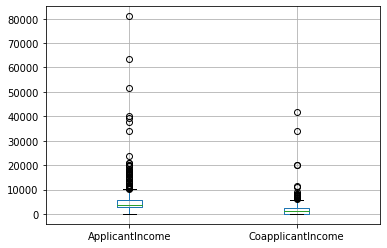

In [44]:
df.boxplot(column = ['ApplicantIncome', 'CoapplicantIncome'])

array([<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>,
       <AxesSubplot:title={'center':'CoapplicantIncome'}, xlabel='Education'>],
      dtype=object)

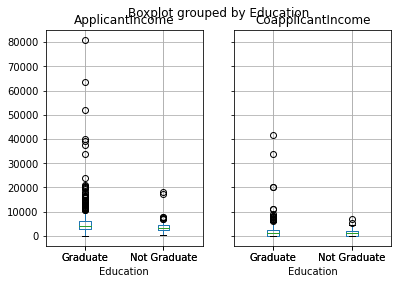

In [45]:
df.boxplot(column = ['ApplicantIncome', 'CoapplicantIncome'], by = 'Education')

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Gender'>

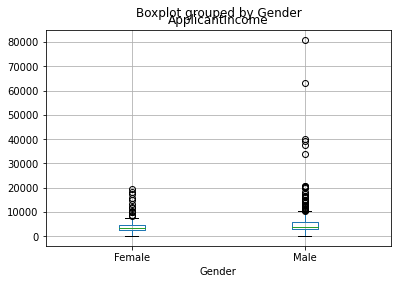

In [46]:
df.boxplot(column = ['ApplicantIncome'], by = 'Gender')

<AxesSubplot:title={'center':'LoanAmount'}, xlabel='Loan_Status'>

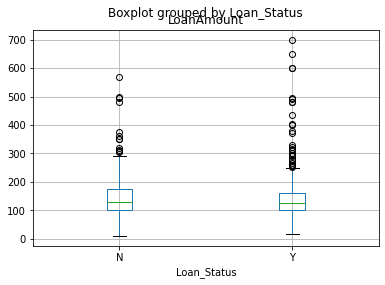

In [47]:
df.boxplot(column = ['LoanAmount'], by = 'Loan_Status')

<AxesSubplot:>

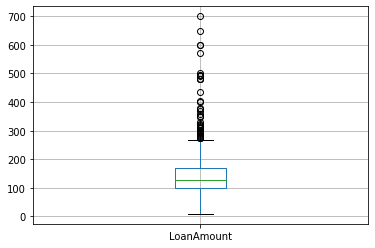

In [49]:
df.boxplot(column = ['LoanAmount'])

<AxesSubplot:>

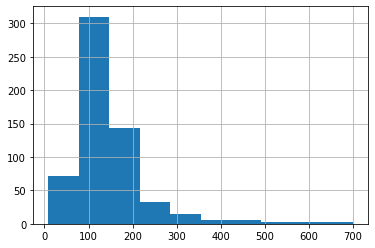

In [50]:
df['LoanAmount'].hist()

### Categorical Variable Analysis

In [52]:
pd.pivot_table(df, values = ['ApplicantIncome', 'CoapplicantIncome'], 
               columns = ['Property_Area', 'Dependents', 'Education', 'Married', 'Self_Employed'])

Property_Area           Rural                                                 \
Dependents                  0                                                  
Education            Graduate                                   Not Graduate   
Married                    No                       Yes                   No   
Self_Employed              No          Yes           No     Yes           No   
ApplicantIncome    5190.71875  6887.666667  5007.594595  4678.5  4004.000000   
CoapplicantIncome  1719.50000     0.000000  2324.922162  2261.5   621.692308   

Property_Area                                                    ...  \
Dependents                                            1          ...   
Education                                      Graduate          ...   
Married                            Yes               No          ...   
Self_Employed         Yes           No     Yes       No     Yes  ...   
ApplicantIncome    2583.0  3910.222222  4875.5   3812.0  4692.0  ...   
CoapplicantIncome  2167.0  1155.222222  1724.5      0.0     0.0  ...   

Property_Area            Urban                                     \
Dependents                   1                     2                
Education         Not Graduate              Graduate                
Married                     No          Yes       No          Yes   
Self_Employed              Yes           No       No           No   
ApplicantIncome         4053.0  4020.428571   3427.0  5906.217391   
CoapplicantIncome       2426.0  1370.000000      0.0  1133.469565   

Property_Area                                                           \
Dependents                                             3+                
Education                      Not Graduate      Graduate Not Graduate   
Married                                 Yes           Yes           No   
Self_Employed              Yes           No            No           No   
ApplicantIncome    3444.333333  3296.285714  11728.428571       1830.0   
CoapplicantIncome  9232.000000  1800.857143    258.714286          0.0   

Property_Area                      
Dependents                         
Education                          
Married               Yes          
Self_Employed          No     Yes  
ApplicantIncome    3469.5  7100.0  
CoapplicantIncome   832.0     0.0  

[2 rows x 72 columns]

array([[<AxesSubplot:title={'center':'Rural'}>,
        <AxesSubplot:title={'center':'Semiurban'}>],
       [<AxesSubplot:title={'center':'Urban'}>, <AxesSubplot:>]],
      dtype=object)

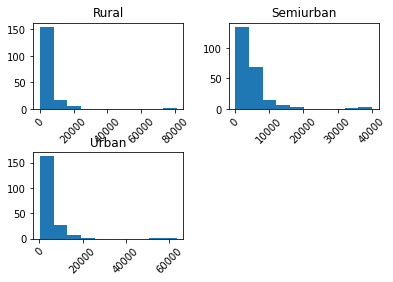

In [54]:
df.hist(column = 'ApplicantIncome', by = 'Property_Area', xrot = 45)

array([[<AxesSubplot:title={'center':'Rural'}>,
        <AxesSubplot:title={'center':'Semiurban'}>],
       [<AxesSubplot:title={'center':'Urban'}>, <AxesSubplot:>]],
      dtype=object)

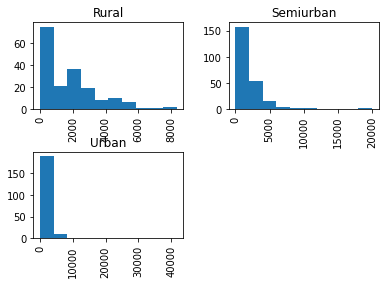

In [55]:
df.hist(column = 'CoapplicantIncome', by = 'Property_Area')

array([<AxesSubplot:title={'center':'Female'}>,
       <AxesSubplot:title={'center':'Male'}>], dtype=object)

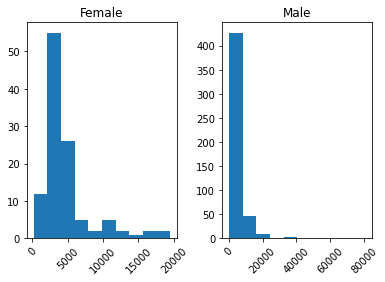

In [56]:
df.hist(column = 'ApplicantIncome', by = 'Gender', xrot = 45)

array([[<AxesSubplot:title={'center':'Rural'}>,
        <AxesSubplot:title={'center':'Semiurban'}>],
       [<AxesSubplot:title={'center':'Urban'}>, <AxesSubplot:>]],
      dtype=object)

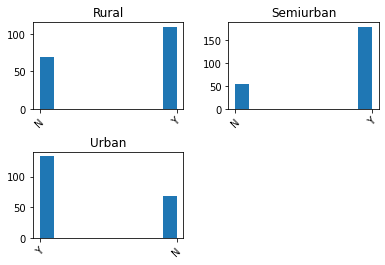

In [57]:
df.hist(column = 'Loan_Status', by = 'Property_Area', xrot = 45)

array([[<AxesSubplot:title={'center':'Rural'}>,
        <AxesSubplot:title={'center':'Semiurban'}>],
       [<AxesSubplot:title={'center':'Urban'}>, <AxesSubplot:>]],
      dtype=object)

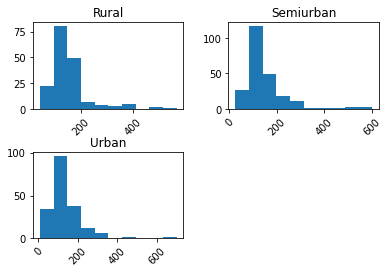

In [58]:
df.hist(column = 'LoanAmount', by = 'Property_Area', xrot = 45)